In [1]:
import scipy.io as sio
data_mat = sio.loadmat('/home/yzy/SIMS/data_mat.mat')
data_mat = data_mat['data_mat']

In [2]:
batch2_x = data_mat[data_mat[:,0]==2,3:]
batch2_y = data_mat[data_mat[:,0]==2,2]
batch2_y = batch2_y-1
batch3_x = data_mat[data_mat[:,0]==3,3:]
batch3_y = data_mat[data_mat[:,0]==3,2]
batch3_y = batch3_y-1
batch5_x = data_mat[data_mat[:,0]==5,3:]
batch5_y = data_mat[data_mat[:,0]==5,2]
batch5_y = batch5_y-1

In [17]:
from keras.layers import Dense,Input
from keras.models import Model
from keras import metrics
x_input = Input(shape=(274,))
x_256 = Dense(256,activation='relu')(x_input)
x_128 = Dense(128,activation='relu')(x_256)
x_32 = Dense(32,activation='relu')(x_128)
x = Dense(1,activation='sigmoid')(x_32)
m = Model(x_input,x)
m.compile(optimizer='adam',loss='binary_crossentropy',metrics=[metrics.binary_accuracy])
m.fit(batch2_x,batch2_y,epochs = 50,shuffle=True,validation_split=0.2,batch_size=5)

Train on 3665 samples, validate on 917 samples
Epoch 1/50
3665/3665 [==============================] - 3s - loss: 0.4562 - binary_accuracy: 0.8022 - val_loss: 0.2908 - val_binary_accuracy: 0.8702
Epoch 2/50
3665/3665 [==============================] - 3s - loss: 0.3047 - binary_accuracy: 0.8682 - val_loss: 0.3038 - val_binary_accuracy: 0.8637
Epoch 3/50
3665/3665 [==============================] - 3s - loss: 0.2764 - binary_accuracy: 0.8824 - val_loss: 0.1397 - val_binary_accuracy: 0.9684
Epoch 4/50
3665/3665 [==============================] - 3s - loss: 0.2633 - binary_accuracy: 0.8881 - val_loss: 0.2272 - val_binary_accuracy: 0.9019
Epoch 5/50
3665/3665 [==============================] - 3s - loss: 0.2531 - binary_accuracy: 0.8947 - val_loss: 0.3949 - val_binary_accuracy: 0.8015
Epoch 6/50
3665/3665 [==============================] - 3s - loss: 0.2496 - binary_accuracy: 0.8906 - val_loss: 0.1837 - val_binary_accuracy: 0.9422
Epoch 7/50
3665/3665 [==============================] - 3s 

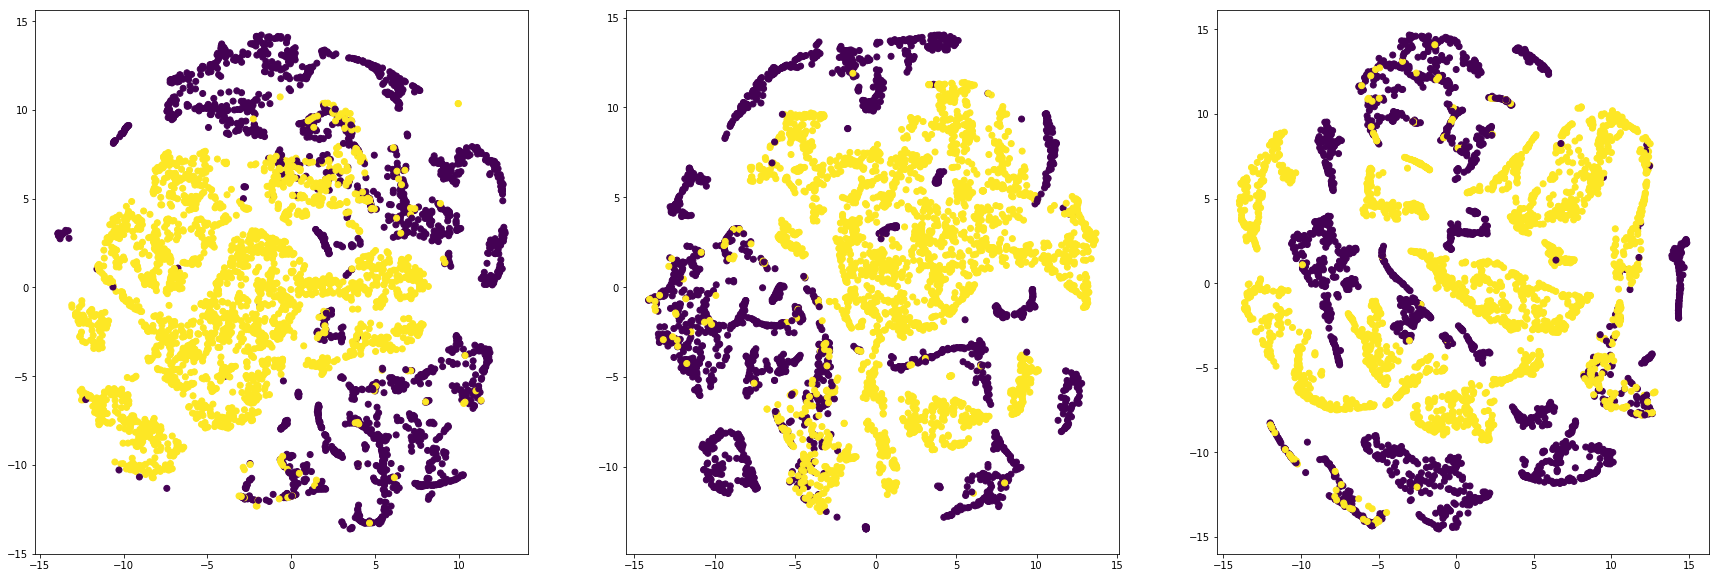

In [19]:
model_256 = Model(x_input,x_256)
model_128 = Model(x_input,x_128)
model_32 = Model(x_input,x_32)
embed_256 = model_256.predict(batch2_x)
embed_128=model_128.predict(batch2_x)
embed_32 = model_32.predict(batch2_x)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vi_embed_256 = TSNE(n_components=2).fit_transform(embed_256)
vi_embed_128 = TSNE(n_components=2).fit_transform(embed_128)
vi_embed_32 = TSNE(n_components=2).fit_transform(embed_32)
plt.figure(figsize=(30,10))
ax = plt.subplot(1,3,1)
plt.scatter(vi_embed_256[:,0],vi_embed_256[:,1],c=batch2_y)
ax = plt.subplot(1,3,2)
plt.scatter(vi_embed_128[:,0],vi_embed_128[:,1],c=batch2_y)
ax = plt.subplot(1,3,3)
plt.scatter(vi_embed_32[:,0],vi_embed_32[:,1],c=batch2_y)
plt.show()

In [27]:
scores = m.evaluate(batch5_x,batch5_y)

6016/6402 [===========================>..] - ETA: 0s

In [28]:
scores

[3.0358784786611008, 0.64917213370821614]

In [5]:
sum(data_mat[data_mat[:,0]==1,:][:,1]==4)

52